 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace = True)
print(whale_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-10                  -0.010263           -0.005341   
2015-03-11                   0.004012            0.005163   
2015-03-12                   0.008265            0.010272   
2015-03-13                  -0.002497           -0.001428   
2015-03-16                   0.007901            0.003583   
2015-03-17                   0.002142            0.002928   
2015-03-18                   0.009603            0.007513   
2015-03-19                  -0.000778           -0.002554   
2015-03-20                   0.009657            0.000983   
2015-03-23              

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(algo_df)

              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
2014-06-04 -0.001838       NaN
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
2014-06-12 -0.000028 -0.003841
2014-06-13  0.001917 -0.000814
2014-06-16  0.001084  0.001831
2014-06-17  0.000922  0.006870
2014-06-18 -0.006303  0.007228
2014-06-19 -0.000853  0.003989
2014-06-20  0.006398  0.003928
2014-06-23 -0.004532 -0.000615
2014-06-24  0.011861 -0.009389
2014-06-25 -0.001321  0.006322
2014-06-26 -0.000213 -0.000334
2014-06-27  0.007136  0.004595
2014-06-30 -0.001584  0.005242
2014-07-01  0.001817  0.007710
2014-07-02  0.003300 -0.002834
2014-07-03  0.001358  0.003125
2014-07-07  0.002782 -0.012258
2014-07-08  0.002488 -0.010457
2014-07-09 -0.001881  0.004427
...     

In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().any()



Algo 1    False
Algo 2     True
dtype: bool

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace = True)
print(algo_df)

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
2014-06-12 -0.000028 -0.003841
2014-06-13  0.001917 -0.000814
2014-06-16  0.001084  0.001831
2014-06-17  0.000922  0.006870
2014-06-18 -0.006303  0.007228
2014-06-19 -0.000853  0.003989
2014-06-20  0.006398  0.003928
2014-06-23 -0.004532 -0.000615
2014-06-24  0.011861 -0.009389
2014-06-25 -0.001321  0.006322
2014-06-26 -0.000213 -0.000334
2014-06-27  0.007136  0.004595
2014-06-30 -0.001584  0.005242
2014-07-01  0.001817  0.007710
2014-07-02  0.003300 -0.002834
2014-07-03  0.001358  0.003125
2014-07-07  0.002782 -0.012258
2014-07-08  0.002488 -0.010457
2014-07-09 -0.001881  0.004427
2014-07-10 -0.001153 -0.011214
2014-07-11 -0.000366  0.002780
2014-07-14  0.004460  0.004614
2014-07-15 -0.002106 -0.007799
2014-07-16 -0.003186  0.000109
2014-07-17 -0.009030 -0.008056
...     

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
#df = pd.read_csv(sp500_history_csv)
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(sp500_df)

               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
2019-04-15  $2905.58
2019-04-12  $2907.41
2019-04-11  $2888.32
2019-04-10  $2888.21
2019-04-09  $2878.20
2019-04-08  $2895.77
2019-04-05  $2892.74
2019-04-04  $2879.39
2019-04-03  $2873.40
2019-04-02  $2867.24
2019-04-01  $2867.19
2019-03-29  $2834.40
2019-03-28  $2815.44
2019-03-27  $2805.37
2019-03-26  $2818.46
2019-03-25  $2798.36
2019-03-22  $2800.71
2019-03-21  $2854.88
2019-03-20  $2824.23
2019-03-19  $2832.57
2019-03-18  $2832.94
2019-03-15  $2822.48
2019-03-14  $2808.48
2019-03-13  $2810.92
2019-03-12  $2791.52
...              ...
2012-11-13  $1374.53
2012-11-12  $1380.03
2012-11-09  $1379.85
2012-11-08  $1377.51
2012-11-07  $1394.53
2012-11-06  $1428.39
2012-11-05  $1417.26
2012-11-02  $1414.20
2012-11-01  $1427.59
2012-10-31  $1412.16
2012-10-26  $1411.94
2012-10-25  $1412.97
2012-10-24  $1408.75
2012-10-23  $1413.11
2012-10-22  $

In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$','',)
sp500_df['Close'] = sp500_df['Close'].astype("float")
sp500_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
2019-04-15    2905.58
2019-04-12    2907.41
2019-04-11    2888.32
2019-04-10    2888.21
2019-04-09    2878.20
2019-04-08    2895.77
2019-04-05    2892.74
2019-04-04    2879.39
2019-04-03    2873.40
2019-04-02    2867.24
2019-04-01    2867.19
2019-03-29    2834.40
2019-03-28    2815.44
2019-03-27    2805.37
2019-03-26    2818.46
2019-03-25    2798.36
2019-03-22    2800.71
2019-03-21    2854.88
2019-03-20    2824.23
2019-03-19    2832.57
2019-03-18    2832.94
2019-03-15    2822.48
2019-03-14    2808.48
2019-03-13    2810.92
2019-03-12    2791.52
               ...   
2012-11-13    1374.53
2012-11-12    1380.03
2012-11-09    1379.85
2012-11-08    1377.51
2012-11-07    1394.53
2012-11-06    1428.39
2012-11-05    1417.26
2012-11-02    1414.20
2012-11-01    1427.59
2012-10-31    1412.16
2012-10-26    1411.94
2012-10-25    1412.97
2012-10-24    1408.75
2012-10-23    1413.11
2012-

In [11]:
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
2019-04-15,2905.58
2019-04-12,2907.41
2019-04-11,2888.32
2019-04-10,2888.21


In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_dayreturns_df = sp500_df.pct_change()
sp500_dayreturns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_dayreturns_df.isnull().any()
sp500_dayreturns_df.dropna(inplace = True)
print(sp500_dayreturns_df)

               Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509
2019-04-12  0.000630
2019-04-11 -0.006566
2019-04-10 -0.000038
2019-04-09 -0.003466
2019-04-08  0.006105
2019-04-05 -0.001046
2019-04-04 -0.004615
2019-04-03 -0.002080
2019-04-02 -0.002144
2019-04-01 -0.000017
2019-03-29 -0.011436
2019-03-28 -0.006689
2019-03-27 -0.003577
2019-03-26  0.004666
2019-03-25 -0.007132
2019-03-22  0.000840
2019-03-21  0.019342
2019-03-20 -0.010736
2019-03-19  0.002953
2019-03-18  0.000131
2019-03-15 -0.003692
2019-03-14 -0.004960
2019-03-13  0.000869
2019-03-12 -0.006902
2019-03-11 -0.002945
...              ...
2012-11-13  0.014047
2012-11-12  0.004001
2012-11-09 -0.000130
2012-11-08 -0.001696
2012-11-07  0.012356
2012-11-06  0.024281
2012-11-05 -0.007792
2012-11-02 -0.002159
2012-11-01  0.009468
2012-10-31 -0.010808
2012-10-26 -0.000156
2012-10-25  0.000729
2012-10-24 -0.002987
2012-10-23  0.003095
2012-10-22  0

In [14]:
# Rename Column
# YOUR CODE HERE
columns = ["sp500Daily Returns"]
sp500_dayreturns_df.columns = columns
sp500_dayreturns_df.head()


,sp500Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
joint_df = pd.concat([whale_df, algo_df,sp500_dayreturns_df], axis="columns", join="inner")
joint_df
print(joint_df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-10                  -0.010263           -0.005341   
2015-03-11                   0.004012            0.005163   
2015-03-12                   0.008265            0.010272   
2015-03-13                  -0.002497           -0.001428   
2015-03-16                   0.007901            0.003583   
2015-03-17                   0.002142            0.002928   
2015-03-18                   0.009603            0.007513   
2015-03-19                  -0.000778           -0.002554   
2015-03-20                   0.009657            0.000983   
2015-03-23              

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

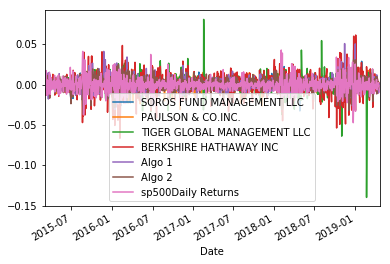

In [16]:
# Plot daily returns
# YOUR CODE HERE
joint_df.plot()

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + joint_df).cumprod() - 1
cumulative_returns 


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123
2015-03-10,-0.012621,-0.002405,-0.015405,-0.020103,-0.023079,-0.016538,0.033104
2015-03-11,-0.008660,0.002746,-0.012145,-0.021226,-0.020154,-0.015944,0.020247
2015-03-12,-0.000467,0.013045,0.000813,-0.010654,-0.023029,-0.004463,0.026483
2015-03-13,-0.002963,0.011598,-0.002887,-0.018710,-0.028327,-0.009502,0.012776


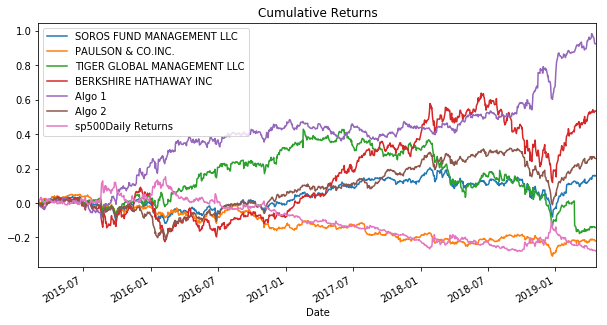

In [18]:
cumulative_returns.plot(figsize=(10,5), title = "Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

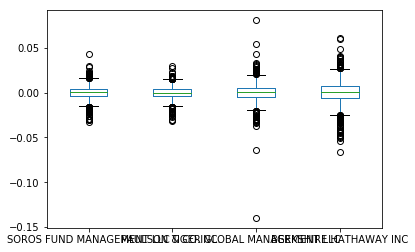

In [19]:
# Box plot to visually show risk
# YOUR CODE HERE
whale_df.plot.box()

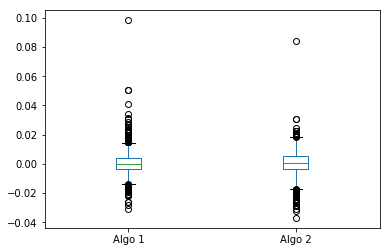

In [20]:
algo_df.plot.box()

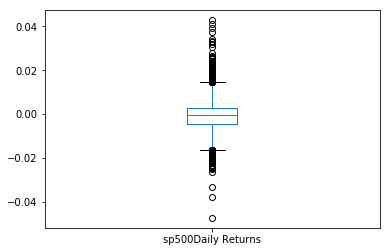

In [21]:
sp500_dayreturns_df.plot.box()

In [22]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
whale_std = whale_df.std()
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [23]:
algo_std = algo_df.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [24]:
sp500_dayreturns_std = sp500_dayreturns_df.std()
sp500_dayreturns_std.head()

sp500Daily Returns    0.008135
dtype: float64

In [25]:
joint_std = joint_df.std()
joint_std.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

In [26]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp500_risk = joint_df["sp500Daily Returns"].std()
joint_df.std()>sp500_risk 

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500Daily Returns             False
dtype: bool

In [27]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = joint_df.std()*np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

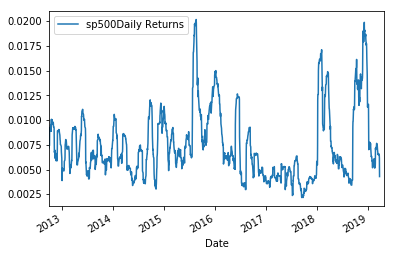

In [28]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_dayreturns_df.rolling(window=21).std().plot()


In [29]:
# Correlation
# YOUR CODE HERE
returns_correlation = joint_df.corr()
returns_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500Daily Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-10                  -0.010263           -0.005341   
2015-03-11                   0.004012            0.005163   
2015-03-12                   0.008265            0.010272   
2015-03-13                  -0.002497           -0.001428   
2015-03-16                   0.007901            0.003583   
2015-03-17                   0.002142            0.002928   
2015-03-18                   0.009603            0.007513   
2015-03-19                  -0.000778           -0.002554   
2015-03-20                   0.009657            0.000983   
2015-03-23              

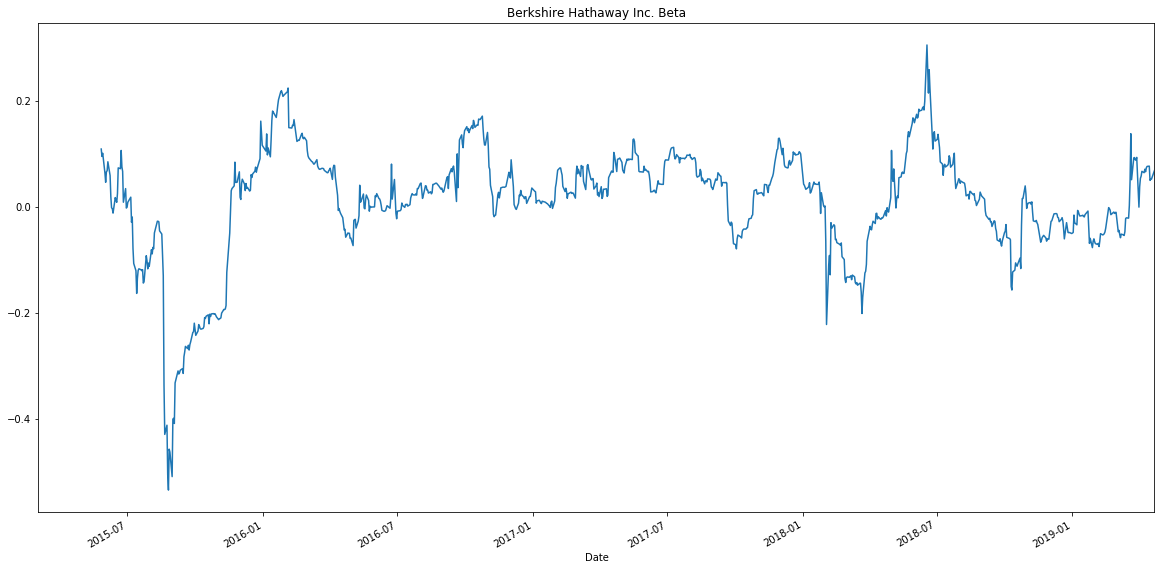

In [30]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
print(joint_df)
variance = joint_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).var()
variance
covariance = joint_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(joint_df["sp500Daily Returns"])
whale_beta = covariance/variance
whale_beta.dropna()
print(whale_beta)
whale_beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [31]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (joint_df.mean()*252)/(joint_df.std()*np.sqrt(252))


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

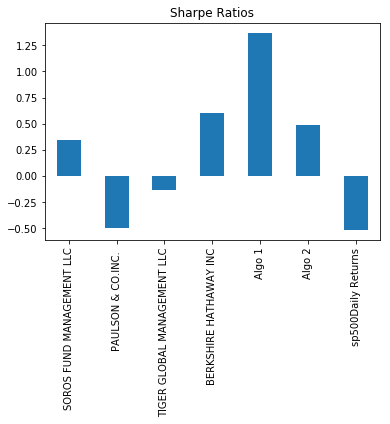

In [32]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [43]:
# Read the first stock
# YOUR CODE HERE
Johnson_Johnson_Prices_csv = Path("./Resources/Johnson  Johnson  LTPrices.csv")
Johnson_Johnson_Prices_df = pd.read_csv(Johnson_Johnson_Prices_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
Johnson_Johnson_Prices_df.rename(columns={"Close":"JNJ"}, inplace=True)

In [44]:
# Read the second stock
# YOUR CODE HERE
Merck_Prices_csv = Path("./Resources/Merck LTPrices.csv")
Merck_Prices_df = pd.read_csv(Merck_Prices_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
Merck_Prices_df.rename(columns={"Close":"MRK"}, inplace=True)

In [45]:
# Read the third stock
# YOUR CODE HERE
Abbott_Labs_Prices_csv = Path("./Resources/Abbott Labs LTPrices.csv")
Abbott_Labs_Prices_df = pd.read_csv(Abbott_Labs_Prices_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
Abbott_Labs_Prices_df.head()
Abbott_Labs_Prices_df.rename(columns={"Close":"ABT"}, inplace=True)

In [46]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
Pharma_stocks_df = pd.concat([Johnson_Johnson_Prices_df, Merck_Prices_df, Abbott_Labs_Prices_df], axis="columns", join="inner")
Pharma_stocks_df.head(10)

,JNJ,MRK,ABT
Date,,,
2015-03-03,102.34,58.34,47.09
2015-03-04,101.65,57.88,47.01
2015-03-05,102.52,57.98,47.44
2015-03-06,100.11,56.84,46.50
2015-03-09,100.66,57.26,46.83
2015-03-10,99.53,56.58,46.17
2015-03-11,98.32,56.06,46.30
2015-03-12,99.83,56.17,47.25
2015-03-13,99.21,56.20,46.88


In [47]:
# Drop Nulls
# YOUR CODE HERE
Pharma_stocks_df.dropna()

,JNJ,MRK,ABT
Date,,,
2015-03-03,102.34,58.34,47.09
2015-03-04,101.65,57.88,47.01
2015-03-05,102.52,57.98,47.44
2015-03-06,100.11,56.84,46.50
2015-03-09,100.66,57.26,46.83
2015-03-10,99.53,56.58,46.17
2015-03-11,98.32,56.06,46.30
2015-03-12,99.83,56.17,47.25
2015-03-13,99.21,56.20,46.88


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
Pharma_stocks_df["Pharma"]=Pharma_stocks_df.dot(weights)
Pharma_stocks_df.head()

,JNJ,MRK,ABT,Pharma
Date,,,,
2015-03-03,102.34,58.34,47.09,69.256667
2015-03-04,101.65,57.88,47.01,68.846667
2015-03-05,102.52,57.98,47.44,69.313333
2015-03-06,100.11,56.84,46.50,67.816667
2015-03-09,100.66,57.26,46.83,68.250000


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [49]:
# YOUR CODE HERE
All_stocks_df=pd.concat([Pharma_stocks_df, joint_df], axis="columns", join="inner")
All_stocks_df.head()
#keep join

,JNJ,MRK,ABT,Pharma,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
Date,,,,,,,,,,,
2015-03-03,102.34,58.34,47.09,69.256667,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,101.65,57.88,47.01,68.846667,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,102.52,57.98,47.44,69.313333,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,100.11,56.84,46.50,67.816667,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,100.66,57.26,46.83,68.250000,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [50]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
All_stocks_df.dropna()

,JNJ,MRK,ABT,Pharma,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
Date,,,,,,,,,,,
2015-03-03,102.34,58.34,47.09,69.256667,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,101.65,57.88,47.01,68.846667,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,102.52,57.98,47.44,69.313333,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,100.11,56.84,46.50,67.816667,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,100.66,57.26,46.83,68.250000,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,99.53,56.58,46.17,67.426667,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,98.32,56.06,46.30,66.893333,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,99.83,56.17,47.25,67.750000,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,99.21,56.20,46.88,67.430000,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [51]:
#Risk
All_stocks_std = All_stocks_df.std()
print(All_stocks_std)
print(joint_df.std())

JNJ                            14.864259
MRK                             7.512535
ABT                            11.425885
Pharma                          9.983628
SOROS FUND MANAGEMENT LLC       0.007900
PAULSON & CO.INC.               0.007025
TIGER GLOBAL MANAGEMENT LLC     0.010902
BERKSHIRE HATHAWAY INC          0.012925
Algo 1                          0.007626
Algo 2                          0.008345
sp500Daily Returns              0.008587
dtype: float64
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500Daily Returns             0.008587
dtype: float64


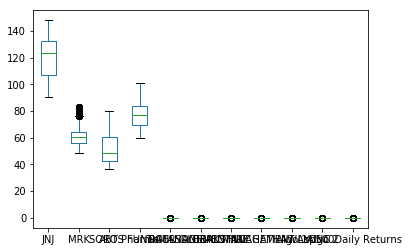

In [52]:
All_stocks_df.plot.box()

In [53]:
# Rolling
# YOUR CODE HERE
All_stocks_df.rolling(window=21).std()

,JNJ,MRK,ABT,Pharma,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
Date,,,,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
                ...   
2019-03-08    0.000687
2019-03-11    0.000695
2019-03-12    0.000635
2019-03-13    0.000481
2019-03-14    0.000449
2019-03-15    0.000425
2019-03-18    0.000483
2019-03-19    0.000603
2019-03-20    0.000668
2019-03-21    0.001012
2019-03-22    0.000615
2019-03-25    0.000552
2019-0

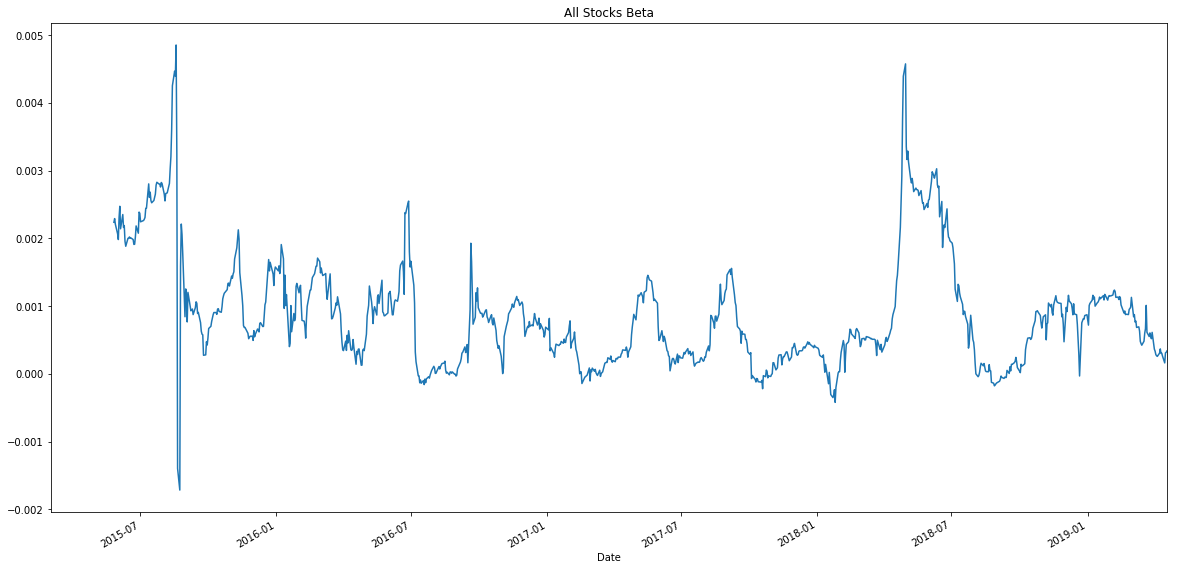

In [54]:
#Beta
variance = All_stocks_df["Pharma"].rolling(window=60).var()
variance
covariance = All_stocks_df["Pharma"].rolling(window=60).cov(All_stocks_df["sp500Daily Returns"])
All_stocks_beta = covariance/variance
All_stocks_beta.dropna()
print(All_stocks_beta)
All_stocks_beta.plot(figsize=(20, 10), title="All Stocks Beta")

In [55]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (All_stocks_df.mean()*252)/(All_stocks_df.std()*np.sqrt(252))

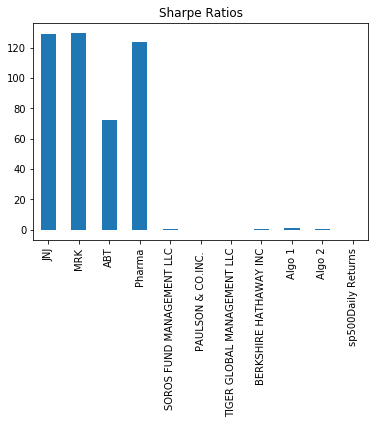

In [56]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE

In [57]:
returns_correlation = All_stocks_df.corr()
returns_correlation

,JNJ,MRK,ABT,Pharma,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
JNJ,1.000000,0.626858,0.662394,0.906216,0.024814,0.012517,-0.046988,0.040150,-0.017474,0.032554,0.007430
MRK,0.626858,1.000000,0.723005,0.837747,0.038608,0.026855,-0.042879,0.033915,0.002758,0.025696,0.024696
ABT,0.662394,0.723005,1.000000,0.891576,0.008358,0.028446,-0.072873,0.012329,0.017241,0.002703,0.032839
Pharma,0.906216,0.837747,0.891576,1.000000,0.025187,0.023799,-0.061875,0.033136,-0.001403,0.023633,0.022410
SOROS FUND MANAGEMENT LLC,0.024814,0.038608,0.008358,0.025187,1.000000,0.699869,0.560992,0.754166,0.320920,0.826717,0.000242
PAULSON & CO.INC.,0.012517,0.026855,0.028446,0.023799,0.699869,1.000000,0.434227,0.545605,0.268766,0.678186,0.012599
TIGER GLOBAL MANAGEMENT LLC,-0.046988,-0.042879,-0.072873,-0.061875,0.560992,0.434227,1.000000,0.424111,0.164124,0.507121,-0.001815
BERKSHIRE HATHAWAY INC,0.040150,0.033915,0.012329,0.033136,0.754166,0.545605,0.424111,1.000000,0.291681,0.687752,-0.013979
Algo 1,-0.017474,0.002758,0.017241,-0.001403,0.320920,0.268766,0.164124,0.291681,1.000000,0.287862,-0.033976
Algo 2,0.032554,0.025696,0.002703,0.023633,0.826717,0.678186,0.507121,0.687752,0.287862,1.000000,-0.002443


In [ ]:
#Merck is correlated with Pharma stocks as a whole. Soros Management Fund is correlated to Algo 2.   